In [439]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')

# XML parsing

## Collins rules from XML to JSON

In [440]:
from xml.dom import minidom
import json

def rules_to_json(file_name, output_file):
    xmldoc = minidom.parse(file_name)

    itemlist = xmldoc.getElementsByTagName('HEADMARKERRULES')
    head_rules = itemlist[0].getElementsByTagName('HEADRULES')

    json_rules = {
        "rules":[]
    }

    index = 0
    for r in head_rules:
        children = r.getElementsByTagName("HEADRULE")

        syntactic_element = r.attributes["LHS"].value
        rule_direction = children[0].attributes["DIR"].value

        json_rules["rules"].append(
            {
                "terminal": syntactic_element,
                "priority_list" : [], 
                "direction": rule_direction
            }
        )

        for c in children:
            json_rules["rules"][index]["priority_list"].append(c.attributes["RHS"].value)

        index += 1

    print(json_rules)

    output_file = open(output_file, "w+")

    json.dump(json_rules, output_file)

    output_file.close()


    

In [441]:
rules_to_json('collins_head_rules_SH.xml', "json_rules.json")

{'rules': [{'terminal': 'NP', 'priority_list': ['NN', 'NNP', 'NNPS', 'NNS', 'NX', 'JJR', 'NP', 'ADJP', 'PRN', 'CD', 'JJ', 'JJS', 'QP', 'RB', '$', 'POS'], 'direction': 'RIGHTMOST'}, {'terminal': 'ADJP', 'priority_list': ['JJ', 'NNS', 'QP', 'NN', '$', 'ADVP', 'VBN', 'VBG', 'ADJP', 'JJR', 'NP', 'JJS', 'DT', 'FW', 'RBR', 'RBS', 'SBAR', 'RB'], 'direction': 'LEFTMOST'}, {'terminal': 'ADVP', 'priority_list': ['RB', 'RBR', 'RBS', 'FW', 'ADVP', 'TO', 'CD', 'JJR', 'JJ', 'IN', 'NP', 'JJS', 'NN'], 'direction': 'RIGHTMOST'}, {'terminal': 'CONJP', 'priority_list': ['CC', 'RB', 'IN'], 'direction': 'RIGHTMOST'}, {'terminal': 'LST', 'priority_list': ['LS', ':'], 'direction': 'RIGHTMOST'}, {'terminal': 'NAC', 'priority_list': ['NN', 'NNS', 'NNP', 'NNPS', 'NP', 'NAC', 'EX', '$', 'CD', 'QP', 'PRP', 'VBG', 'JJ', 'JJS', 'JJR', 'ADJP', 'FW'], 'direction': 'LEFTMOST'}, {'terminal': 'PP', 'priority_list': ['NP', 'VP', 'S', 'VBG', 'VBN', 'RP', 'FW', 'IN', 'TO'], 'direction': 'RIGHTMOST'}, {'terminal': 'PRT', 'p

In [442]:
!pip install svgling
!pip install progressbar2

You should consider upgrading via the '/opt/anaconda/envs/wmlce/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda/envs/wmlce/bin/python -m pip install --upgrade pip' command.


## Datasets names definition

In [443]:
dataset_test = 'heuristics_evaluation_set.txt'
dataset_train = 'training_full.csv'

## Reading Datasets

In [459]:
data = pd.read_csv(dataset_test, delimiter="\t", error_bad_lines=False, )

In [445]:
data = pd.read_csv(dataset_train)
#data.head()

/opt/anaconda/envs/wmlce/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [460]:
import random
N= random.randint(0, len(data["sentence1_parse"].values))
sentence1_tree, sentence2_tree, s1, s2 = data["sentence1_parse"].values[N], data["sentence2_parse"].values[N], data["sentence1"].values[N], data["sentence1"].values[N]

## Relevance Mesaure

A is_related with B <=> A == B

In [461]:
def are_related(w1, w2):
    w1 = w1.lower()
    w2 = w2.lower()
    
    if w1.strip() == w2.strip():
        return True
    else:
        return False

In [462]:
import requests

def is_related(w1, w2):   
    try:
        obj = requests.get(f'http://api.conceptnet.io/c/en/{w1}').json()
        obj['edges']
        for e in obj['edges']:
            if e["start"]["label"] == w2.strip():
                return 1
        return 0
    except Exception as e:
        print(e)
        return 0
    
    

['The', 'lawyer', 'and', 'the', 'banker', 'shouted', '.']
The lawyer and the banker shouted .


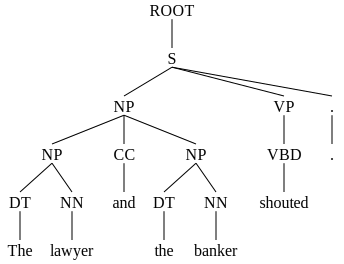

In [463]:
from nltk import ParentedTree

'''
We want get leafs positions for tree 1 and tree 2
Iterate over leafs1 and leafs2 and measure word relations 
Take best relations
Visit bottom-up the tree to set REL tag
'''

t1 = ParentedTree.fromstring(sentence1_tree)
t2 = ParentedTree.fromstring(sentence2_tree)

print(t1.leaves())
print(s1)
import svgling


svgling.draw_tree(t1)   

In [464]:
stop_words = ['The', "Or", ".", ",", ";", ":", "-", "/", "\\", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
             'And', "Then","Why", "What", "How", "If", "To", "Be", "Can", "Have", "Had", "Was","Is","Are","Were","Which", "Would", "That", "A", "As", "Of", "Can't", "In", "For"]

stop_word_lower= [x.lower() for x in stop_words]
for x in stop_word_lower:
    stop_words.append(x)

stop_words

['The',
 'Or',
 '.',
 ',',
 ';',
 ':',
 '-',
 '/',
 '\\',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'And',
 'Then',
 'Why',
 'What',
 'How',
 'If',
 'To',
 'Be',
 'Can',
 'Have',
 'Had',
 'Was',
 'Is',
 'Are',
 'Were',
 'Which',
 'Would',
 'That',
 'A',
 'As',
 'Of',
 "Can't",
 'In',
 'For',
 'the',
 'or',
 '.',
 ',',
 ';',
 ':',
 '-',
 '/',
 '\\',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'and',
 'then',
 'why',
 'what',
 'how',
 'if',
 'to',
 'be',
 'can',
 'have',
 'had',
 'was',
 'is',
 'are',
 'were',
 'which',
 'would',
 'that',
 'a',
 'as',
 'of',
 "can't",
 'in',
 'for']

## Functions to insert REL tag at leaves level

In [465]:
def relate_leafs(t1, t2):
    relations = []
    
    l1 = t1.leaves()
    l2 = t2.leaves()
    words = {}
    
    # create a list of tuple with index of leaf that is in the relation es: (P1, P2)
    for w1 in l1:
        for w2 in l2:
            if are_related(w1, w2) and w1 not in words and  w1 not in stop_words:
                words[w1] = 1
                relations.append((l1.index(w1), l2.index(w2)))
                
    
    return relations


def insert_rel_tag_to_leafs(t1, t2, rels):
    
    # project the REL tag on pre-terminals 

    index = 1
    
    for r in rels:
        if index < 12:
            t1[t1.leaf_treeposition(r[0])] += f"-- REL{index} --" 
            if "-- REL -- " not in t1[t1.leaf_treeposition(r[0])[:-1]].label():
                parent1 = t1[t1.leaf_treeposition(r[0])[:-1]]
                parent1.set_label(parent1.label() + f"-- REL{index} --")

            t2[t2.leaf_treeposition(r[1])] += f"-- REL{index} --" 

            if "-- REL -- " not in t2[t2.leaf_treeposition(r[1])[:-1]].label():
                parent2 = t2[t2.leaf_treeposition(r[1])[:-1]]
                parent2.set_label(parent2.label() + f"-- REL{index} --")
        else:
            t1[t1.leaf_treeposition(r[0])] += f"-- REL 00 --" 
            if "-- REL -- " not in t1[t1.leaf_treeposition(r[0])[:-1]].label():
                parent1 = t1[t1.leaf_treeposition(r[0])[:-1]]
                parent1.set_label(parent1.label() + f"-- REL 00 --")

            t2[t2.leaf_treeposition(r[1])] += f"-- REL 00 --" 

            if "-- REL -- " not in t2[t2.leaf_treeposition(r[1])[:-1]].label():
                parent2 = t2[t2.leaf_treeposition(r[1])[:-1]]
                parent2.set_label(parent2.label() + f"-- REL 00 --")
        index += 1

    return t1, t2
    
    
    
rels = relate_leafs(t1, t2)
t1, t2 = insert_rel_tag_to_leafs(t1, t2, rels)

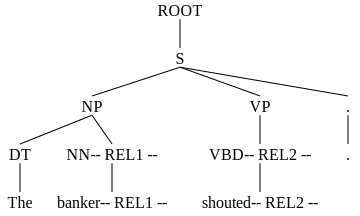

In [466]:
 svgling.draw_tree(t2)   

In [467]:

print(rels)

[(4, 1), (5, 2)]


In [468]:
#load rules 
collins_znz_rules = json.load(open("json_rules.json", "r+"))

In [469]:
#recursive function to project REL tag

def project_rels(t, parent, children, index_of_rel = 0):
    
    # base case 1
    if parent.label() == "ROOT":
        return t

    
    direction = "" 
    p_list = None

    # search for rule with our terminal in rules
    for rule in collins_znz_rules["rules"]:
        # found the terminal
        if rule["terminal"] == parent.label():
            direction = rule["direction"] 
            p_list = rule["priority_list"]
            break

    if p_list == None:
        # no terminal in our rules
        return project_rels(t, parent.parent(), t[parent.parent().treeposition()][:], index_of_rel)
    RIGHTMOST = False
    #if RIGHTMOST reversing the order of children
    if direction == "RIGHTMOST":
        RIGHTMOST = True
        
    priors = {}
    for c in children:
        # if the child is in the priority list append it on priors list, then teke the min index (most important)
        if c.label().split("-- REL")[0].strip() in p_list:        
            priors[p_list.index(c.label().split("-- REL")[0])] = c.label()
            
    
    if len(priors) > 0:   
        if RIGHTMOST:
            up = min(list(priors.keys()))
        else:
            up = min(list(priors.keys()))
          
        up = priors[up]
        if len(up.split("-- REL"))>1:
            #take the most important child and project rel on the parent
            rel_index = up.split("-- REL")[1].replace("--","").replace(" ","")
            parent.set_label(parent.label() + f"-- REL{rel_index} --")

    #recursion
    return project_rels(t, parent.parent(), t[parent.parent().treeposition()][:], index_of_rel)

## Build ParentedTree from String

In [470]:
def recursive_rel_projection(t1, t2):
    t1_res, t2_res = t1, t2
    for r in rels:
        parent1 = t1_res[t1_res.leaf_treeposition(r[0])[:-2]]
        children1 = t1_res[parent1.treeposition()[:]]
        t1_res = project_rels(t1_res, parent1, children1, 0)
        
        parent2 = t2_res[t2_res.leaf_treeposition(r[1])[:-2]]
        children2 = t2_res[parent2.treeposition()[:]]
        
        t2_res = project_rels(t2_res, parent2, children2, 1)

    return t1_res, t2_res
        
t1, t2 = recursive_rel_projection(t1, t2)

TclError: no display name and no $DISPLAY environment variable

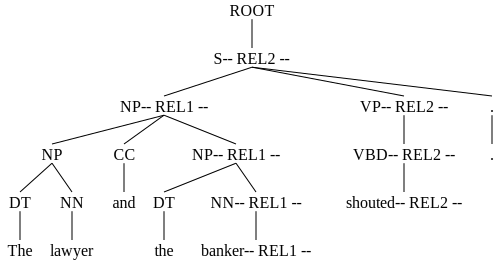

In [471]:
t1

TclError: no display name and no $DISPLAY environment variable

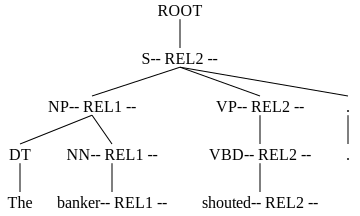

In [473]:
t2

## Measure relations between leaves of the two trees
### We use ConceptNet in order to measure the relation between two leafs, REL = 1 if CONCEPT_1 is in relation in ConceptNet with CONCEPT_2, 0 otherwise

In [238]:
def get_rel_tress_from_data(data, c_t1, c_t2, output_name="output_REL.csv"):

    import progressbar

    bar = progressbar.ProgressBar(max_value=len(data))

    trees1, trees2 = [], []

    for i in range(len(data)):
        try:
            sentence1_tree, sentence2_tree = data[c_t1].values[i], data[c_t2].values[i]
            t1 = ParentedTree.fromstring(sentence1_tree)
            t2 = ParentedTree.fromstring(sentence2_tree)
            rels = relate_leafs(t1, t2)
            t1, t2 = insert_rel_tag_to_leafs(t1, t2, rels)
            t1, t2 = recursive_rel_projection(t1, t2)
            trees1.append(t1._pformat_flat("", "()", False))
            trees2.append(t2._pformat_flat("", "()", False))
        except Exception as e:
            trees1.append(t1._pformat_flat("", "()", False))
            trees2.append(t2._pformat_flat("", "()", False))
        
        bar.update(i)


    data["s1_rel"] = trees1
    data["s2_rel"] = trees2
    
    data.to_csv(output_name)

    return data



In [438]:
get_rel_tress_from_data(data, "sentence1_parse", "sentence2_parse", "MultiNLI_with_REL_final.csv")

 99% (391146 of 391165) |############### | Elapsed Time: 0:22:56 ETA:   0:00:00

,Unnamed: 0,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,promptID,pairID,genre,label1,label2,label3,label4,label5,s1_rel,s2_rel
0,0,neutral,( ( Conceptually ( cream skimming ) ) ( ( has ...,( ( ( Product and ) geography ) ( ( are ( what...,(ROOT (S (NP (JJ Conceptually) (NN cream) (NN ...,(ROOT (S (NP (NN Product) (CC and) (NN geograp...,Conceptually cream skimming has two basic dime...,Product and geography are what make cream skim...,31193,31193n,government,neutral,NaN,NaN,NaN,NaN,(ROOT (S (NP (JJ Conceptually) (NN-- REL1 -- c...,(ROOT (S (NP (NN-- REL3 -- Product-- REL3 --) ...
1,1,entailment,( you ( ( know ( during ( ( ( the season ) and...,( You ( ( ( ( lose ( the things ) ) ( to ( the...,(ROOT (S (NP (PRP you)) (VP (VBP know) (PP (IN...,(ROOT (S (NP (PRP You)) (VP (VBP lose) (NP (DT...,you know during the season and i guess at at y...,You lose the things to the following level if ...,101457,101457e,telephone,entailment,NaN,NaN,NaN,NaN,(ROOT (S (NP (PRP-- REL1 -- you-- REL1 --)) (V...,(ROOT (S-- REL3 -- (NP (PRP-- REL1 -- You-- RE...
2,2,entailment,( ( One ( of ( our number ) ) ) ( ( will ( ( (...,( ( ( A member ) ( of ( my team ) ) ) ( ( will...,(ROOT (S (NP (NP (CD One)) (PP (IN of) (NP (PR...,(ROOT (S (NP (NP (DT A) (NN member)) (PP (IN o...,One of our number will carry out your instruct...,A member of my team will execute your orders w...,134793,134793e,fiction,entailment,NaN,NaN,NaN,NaN,(ROOT (S (NP (NP (CD One)) (PP (IN of) (NP (PR...,(ROOT (S (NP (NP (DT A) (NN member)) (PP (IN o...
3,3,entailment,( ( How ( ( ( do you ) know ) ? ) ) ( ( All th...,( ( This information ) ( ( belongs ( to them )...,(ROOT (S (SBARQ (WHADVP (WRB How)) (SQ (VBP do...,(ROOT (S (NP (DT This) (NN information)) (VP (...,How do you know? All this is their information...,This information belongs to them.,37397,37397e,fiction,entailment,NaN,NaN,NaN,NaN,(ROOT (S (SBARQ (WHADVP (WRB How)) (SQ (VBP do...,(ROOT (S (NP (DT-- REL1 -- This-- REL1 --) (NN...
4,4,neutral,( yeah ( i ( ( tell you ) ( what ( ( though ( ...,( ( The ( tennis shoes ) ) ( ( have ( ( a rang...,(ROOT (S (VP (VB yeah) (S (NP (FW i)) (VP (VB ...,(ROOT (S (NP (DT The) (NN tennis) (NNS shoes))...,yeah i tell you what though if you go price so...,The tennis shoes have a range of prices.,50563,50563n,telephone,neutral,NaN,NaN,NaN,NaN,(ROOT (S (VP (VB yeah) (S (NP (FW i)) (VP (VB ...,(ROOT (S (NP-- REL1 -- (DT The) (NN-- REL1 -- ...
5,5,entailment,( ( my walkman ) ( broke ( so ( i ( 'm ( upset...,( ( ( ( I ( 'm ( upset ( that ( ( my walkman )...,(ROOT (S (NP (PRP$ my) (NN walkman)) (VP (VBD ...,(ROOT (S (S (NP (PRP I)) (VP (VBP 'm) (ADJP (V...,my walkman broke so i'm upset now i just have ...,I'm upset that my walkman broke and now I have...,110116,110116e,telephone,entailment,NaN,NaN,NaN,NaN,(ROOT (S-- REL3 -- (NP (PRP$-- REL1 -- my-- RE...,(ROOT (S (S-- REL5 -- (NP (PRP-- REL4 -- I-- R...
6,6,neutral,( But ( ( a ( few ( Christian mosaics ) ) ) ( ...,( ( Most ( of ( the ( Christian mosaics ) ) ) ...,(ROOT (S (CC But) (NP (DT a) (JJ few) (JJ Chri...,(ROOT (S (NP (NP (JJS Most)) (PP (IN of) (NP (...,But a few Christian mosaics survive above the ...,Most of the Christian mosaics were destroyed b...,42487,42487n,travel,neutral,NaN,NaN,NaN,NaN,(ROOT (S (CC But) (NP (DT a) (JJ few) (JJ-- RE...,(ROOT (S (NP (NP (JJS Most)) (PP-- REL2 -- (IN...
7,7,entailment,( -LRB- ( ( ( Read ( for ( ( ( Slate 's ) take...,( Slate ( ( had ( ( an opinion ) ( on ( ( Jack...,(ROOT (S (-LRB- -LRB-) (VP (VB Read) (PP (IN f...,(ROOT (S (NP (NNP Slate)) (VP (VBD had) (NP (N...,(Read for Slate 's take on Jackson's findings.),Slate had an opinion on Jackson's findings.,1069,1069e,slate,entailment,NaN,NaN,NaN,NaN,(ROOT (S (-LRB- -LRB-) (VP (VB Read) (PP (IN f...,(ROOT (S (NP (NNP-- REL1 -- Slate-- REL1 --)) ...
8,8,contradiction,( ( ( Gays and ) lesbians ) . ),( Heterosexuals . ),(ROOT (NP (NP (NP (NNS Gays)) (CC and) (NP (NN...,(ROOT (NP (NNS Heterosexu

## Project [REL] tag in the tree, from leafs to root. [REL] to S label if there is a VP with [REL] tag in the tree

In [ ]:
svgling.draw_tree(t1)    

In [ ]:
svgling.draw_tree(t2)